In [4]:
%matplotlib inline

import time

import numpy as np
import pandas as pd
import seaborn as sns

from easymdp3.domains.gridworld import GridWorld
from easymdp3.algorithms.qlearning import Qlearning

In [5]:
gw = GridWorld(
    gridworld_array=['...........',
                     '.xxxxxxxxxy',
                     '.xxxxxxxxxx'],
    absorbing_states=[(10, 1),],
    init_state=(0, 1),
    feature_rewards={'.':-1, 'x':-10, 'y':100},
    discount_rate=.99)
s_features = gw.state_features

In [13]:
np.random.seed(123)
all_run_data = []

In [14]:
start = time.time()
for i in range(20):
    params = {'learning_rate': 1,
              'eligibility_trace_decay': .8,
              'initial_qvalue': 100}
    qlearn = Qlearning(gw, 
                       decision_rule='softmax',
                       softmax_temp=.2, 
                       discount_rate=.99,
                       **params)
    run_data = qlearn.train(episodes=50, 
                            max_steps=100,
                            run_id=i,
                            return_run_data=True)
    for r in run_data:
        r.update(params)
    all_run_data.extend(run_data)
print("total time: {:.2f}".format(time.time() - start))

total time: 2.01


In [15]:
run_df = pd.DataFrame(all_run_data)
run_df['is_x'] = run_df['s'].apply(lambda s: s_features[s] == 'x')
param_list = run_df[['learning_rate', 'initial_qvalue', 'eligibility_trace_decay']]
param_list = param_list.to_records(index=False)
param_list = [str(tuple(p)) for p in param_list]
run_df['params'] = param_list

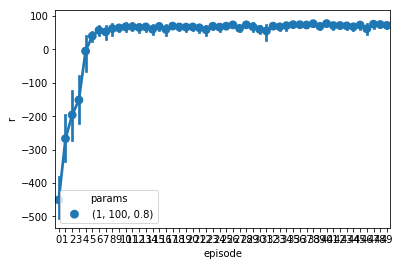

In [16]:
ep_rewards = run_df.groupby(['run_id', 'episode', 'params'])['r']\
    .sum().reset_index()
ax = sns.pointplot(data=ep_rewards, 
                   x='episode', 
                   y='r', 
                   hue='params')